Project Name: Heart Failure Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../input/heart-failure-prediction/heart.csv')
print('Dataset :\n',dataset.head(5))
print('--------------------------------------------------------------------------')
print('Dataset Shape :',dataset.shape)
print('--------------------------------------------------------------------------')
print('Columns Name :')
for i in dataset.columns:
  print(i)


Dataset :
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
--------------------------------------------------------------------------
Dataset Shape : (918, 12)
--------------------------------------------------------------------------
Columns Name :
Age
S

In [3]:
Possitive = dataset[dataset['HeartDisease'].isin([1])]
Negative = dataset[dataset['HeartDisease'].isin([0])]
print('Possitive :',Possitive)
print('-----------------------------------------------------------------------')
print('Negative:',Negative)


Possitive :      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
1     49   F           NAP        160          180          0     Normal   
3     48   F           ASY        138          214          0     Normal   
8     37   M           ASY        140          207          0     Normal   
11    58   M           ATA        136          164          0         ST   
13    49   M           ASY        140          234          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
912   57   F           ASY        140          241          0     Normal   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
1      156     

Possitive: 508
Negative: 410


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


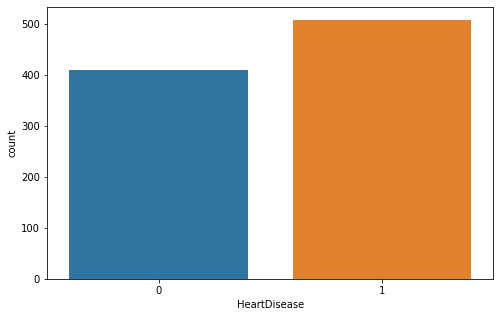

In [4]:
number = dataset.HeartDisease
p,n = number.value_counts()
print('Possitive:',p)
print('Negative:',n)

plt.figure(figsize=(8,5))
sns.countplot(number,data=dataset,label='Counts')
plt.show()

Male: 725
Female: 193


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


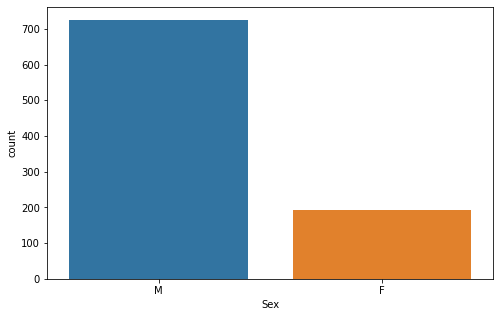

In [5]:
g = dataset.Sex
m,f = g.value_counts()
print('Male:',m)
print('Female:',f)

plt.figure(figsize=(8,5))
sns.countplot(g,data=dataset,label='Counts')
plt.show()


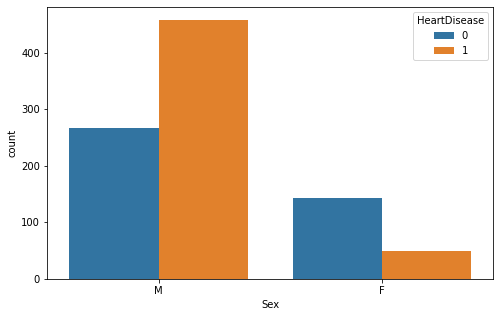

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex',hue='HeartDisease',data=dataset)
plt.show()

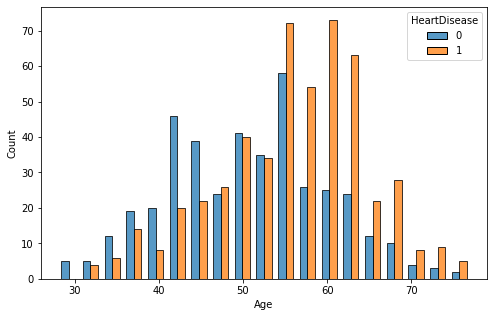

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(x='Age',hue='HeartDisease',data=dataset, multiple="dodge", shrink=0.7)
plt.show()

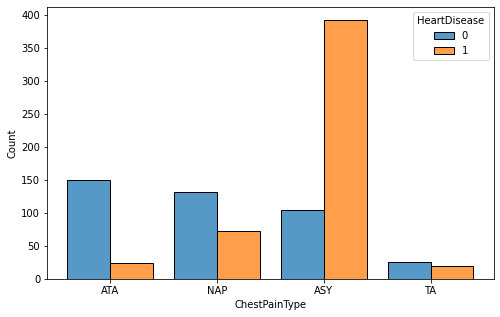

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(x='ChestPainType',hue='HeartDisease',data=dataset, multiple="dodge",shrink=0.8)
plt.show()

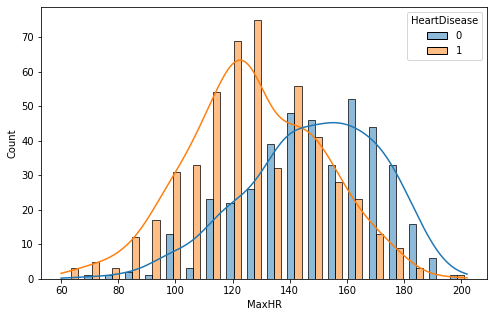

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(x='MaxHR',hue='HeartDisease',data=dataset,multiple='dodge', shrink= 0.7,kde=True)
plt.show()
  

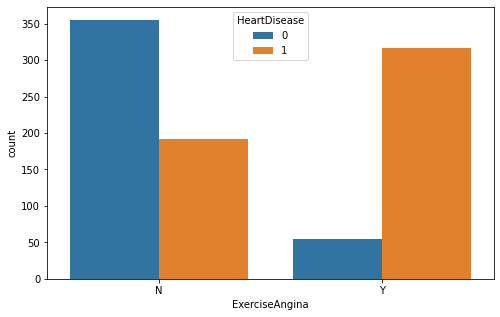

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='ExerciseAngina',hue='HeartDisease',data=dataset)
plt.show()

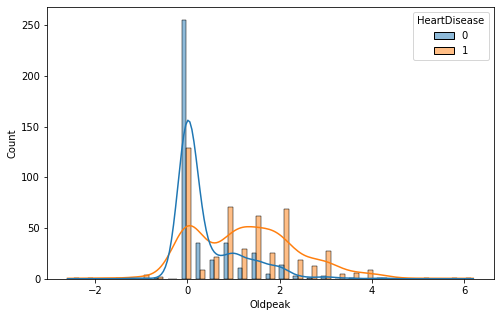

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(x='Oldpeak',hue='HeartDisease',data=dataset,multiple='dodge', shrink= 0.7,kde=True)
plt.show()

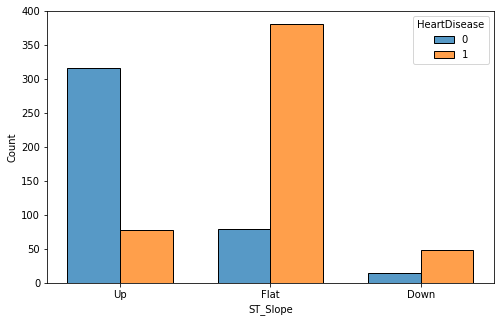

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(x='ST_Slope',hue='HeartDisease',data=dataset,multiple='dodge', shrink= 0.7)
plt.show()

In [13]:
dataset.std()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64

In [14]:
dataset.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


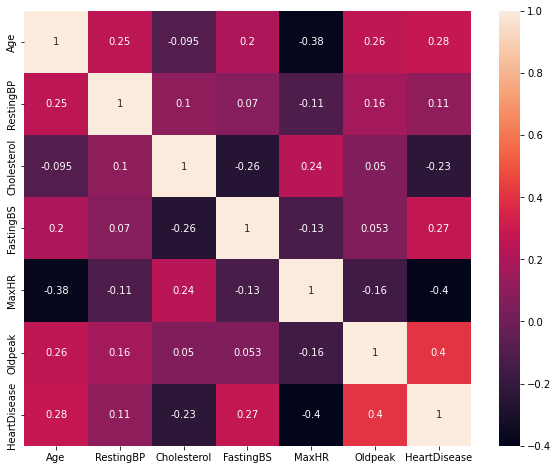

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

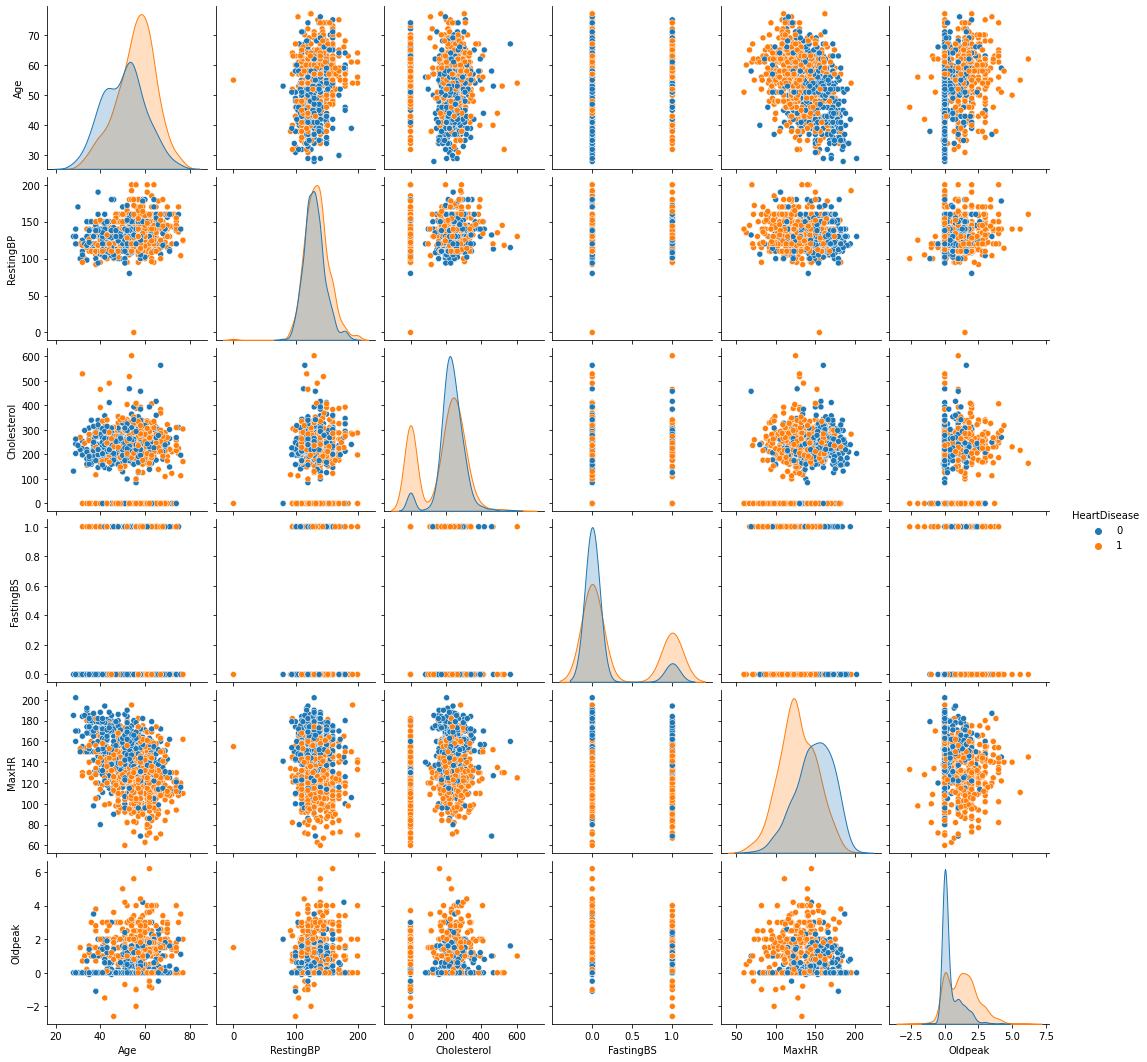

In [16]:
sns.pairplot(dataset,hue='HeartDisease')

In [17]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:>

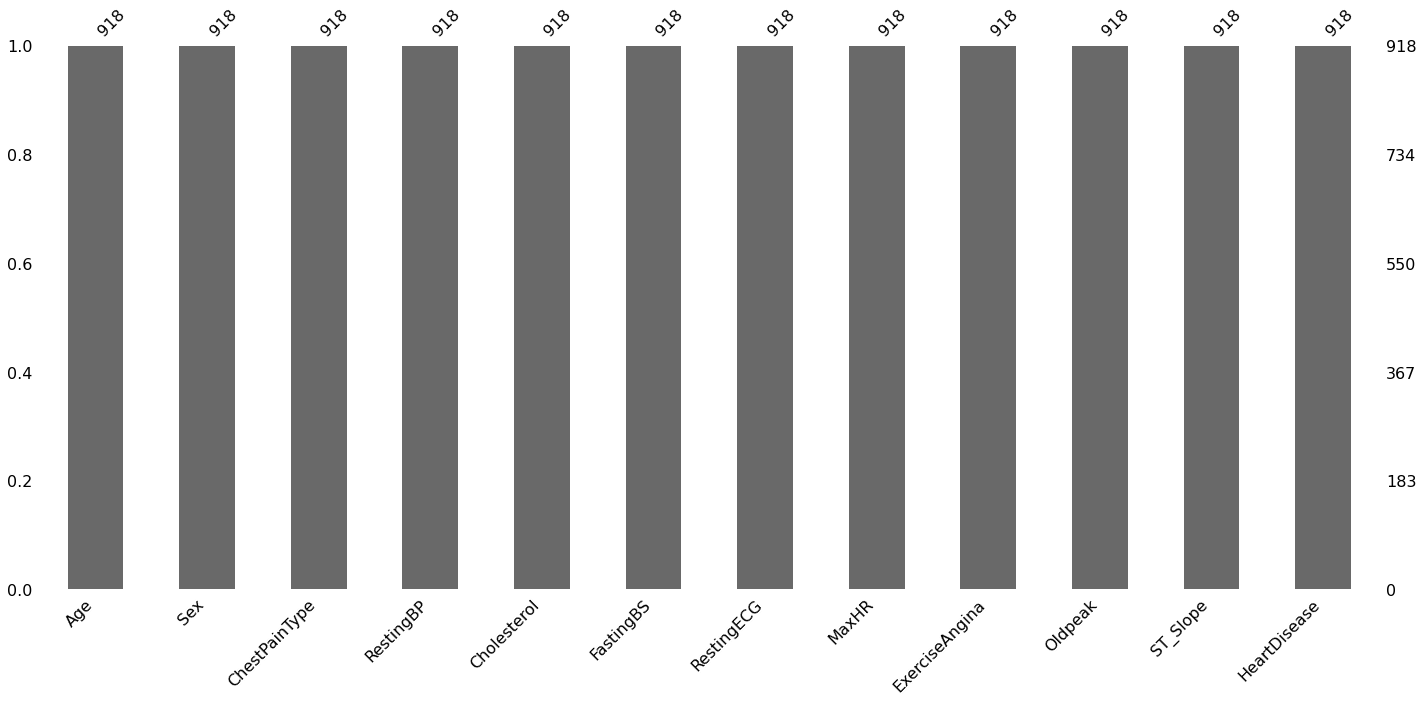

In [18]:
import missingno as msnog
msnog.bar(dataset)

In [19]:
num = dataset.select_dtypes('number').columns.to_list()
cat = dataset.select_dtypes('object').columns.to_list()
num_dataset = dataset[num]
cat_dataset = dataset[cat]

print('Numerical : ',num_dataset.columns)
print('\n')
print('Categories : ',cat_dataset.columns)

Numerical :  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


Categories :  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [20]:
dataset['Sex'] = dataset['Sex'].map({'M':1,'F':0}) 
dataset['ChestPainType'] = dataset['ChestPainType'].map({'ATA':0,'NAP':1,'ASY':2,'TA':3}) 
dataset['RestingECG'] = dataset['RestingECG'].map({'Normal':0,'LVH':1,'ST':2}) 
dataset['ExerciseAngina'] = dataset['ExerciseAngina'].map({'N':0,'Y':1}) 
dataset['ST_Slope'] = dataset['ST_Slope'].map({'Up':0,'Flat':1,'Down':2}) 

In [21]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['ChestPainType'], prefix='ChestPainType')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['RestingECG'], prefix='RestingECG')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['ST_Slope'], prefix='ST_Slope')], axis=1)

In [22]:
dataset.drop(['ChestPainType','RestingECG','ST_Slope'],axis=1,inplace=True)

In [23]:
y = dataset['HeartDisease'].values
dataset = dataset.drop('HeartDisease',axis=1,inplace=False)
X = dataset.values

In [24]:
one_column = np.ones((X.shape[0],1))
X = np.concatenate((one_column, X), axis = 1)

In [25]:
y=np.reshape(y,(y.shape[0],1))
theta2 = np.zeros(X.shape[1])

In [26]:
print(X.shape)
print(y.shape)
print(theta2.shape)

(918, 19)
(918, 1)
(19,)


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,1:] = sc.fit_transform(X[:,1:])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=22)
print('X_train :',X_train[:3,:])
print('X_train shape:',X_train.shape)
print('---------------------------------------------------------------')
print('X_test :',X_test[:3,:])
print('X_test Shape :',X_test.shape)
print('---------------------------------------------------------------')
print('y_train :',y_train[:3,])
print('y_train shape :',y_train.shape)
print('---------------------------------------------------------------')
print('y_test :',y_test[:3,])
print('X_test shape :',y_test.shape)


X_train : [[ 1.          0.05188098  0.51595242 -0.12951283 -1.81843477  1.81375843
  -1.05355971  1.21424608  1.98185537 -0.48188667 -0.53283777  0.9223917
  -0.22967867  0.81427482 -0.50747832 -0.49044933 -0.86905588  0.99782372
  -0.27144836]
 [ 1.         -0.26633776 -1.93816322 -0.12951283  0.97142348 -0.55134134
   0.20398245  1.21424608  0.29328271 -0.48188667 -0.53283777  0.9223917
  -0.22967867  0.81427482 -0.50747832 -0.49044933 -0.86905588  0.99782372
  -0.27144836]
 [ 1.         -2.06957728 -1.93816322 -0.7780189   0.10245124 -0.55134134
   2.16889206 -0.8235563  -0.17576525  2.07517671 -0.53283777 -1.08413811
  -0.22967867  0.81427482 -0.50747832 -0.49044933  1.15067399 -1.00218103
  -0.27144836]]
X_train shape: (734, 19)
---------------------------------------------------------------
X_test : [[ 1.          1.32475593  0.51595242  1.49175234  0.43174598 -0.55134134
  -0.66057778  1.21424608 -0.83243239  2.07517671 -0.53283777 -1.08413811
  -0.22967867  0.81427482 -0.50747

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

LR = LogisticRegression(C =0.2, random_state=22,penalty='l2')
Cross_Validation_LR = cross_validate(LR, X_train, y_train, cv=6, return_train_score=True)

print('Train score value :',Cross_Validation_LR['train_score'])
print('Test score value :',Cross_Validation_LR['test_score'])

score_value_LR = cross_val_score(estimator=LR , X = X_train, y = y_train, cv=6)
print('Cross_Validation Score is :',np.mean(score_value_LR)*100)

Train score value : [0.88052373 0.87070376 0.86764706 0.86928105 0.87254902 0.87418301]
Test score value : [0.82113821 0.89430894 0.89344262 0.87704918 0.86885246 0.85245902]
Cross_Validation Score is : 86.78750721933449


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [30]:
LR.fit(X_test,y_test)
print('Test score value :',LR.score(X_test,y_test))

Test score value : 0.875


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


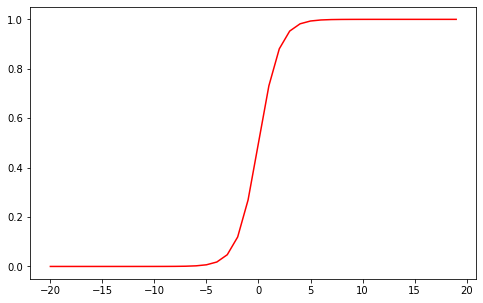

In [31]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
n = np.arange(-20,20,step=1)
plt.figure(figsize=(8,5))
plt.plot(n,sigmoid(n),'r')
plt.show()

In [32]:
def cost_function_reg(theta2, X2, y2,lr):
    theta2 = np.matrix(theta2)
    X2 = np.matrix(X2)
    y2 = np.matrix(y2)
    first = np.multiply(-y2, np.log(sigmoid(X2 * theta2.T)))
    second = np.multiply((1 - y2), np.log(1 - sigmoid(X2 * theta2.T)))
    total_equation=np.sum(first - second) / (len(X2))
    reg = (lr / 2 * len(X2)) * np.sum(np.power(theta2[:,1:theta2.shape[1]], 2))
    final = total_equation + reg
    return final 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


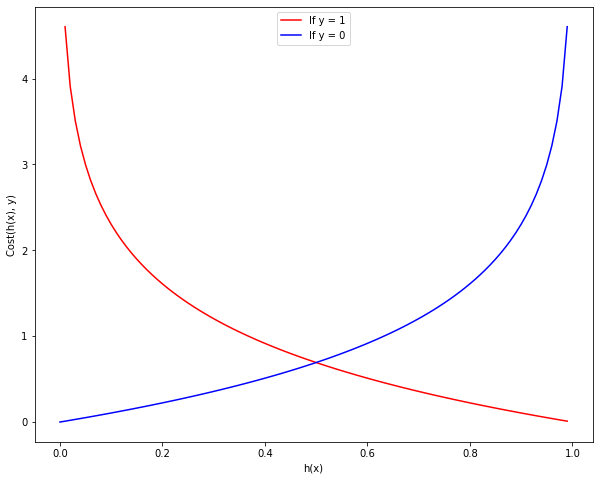

In [33]:
c = np.arange(0,1,step=0.01)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(c, np.multiply(1, -np.log(c)), c='r', label='If y = 1')
ax.plot(c, np.multiply(1, -np.log(1-c)), c='b', label='If y = 0')
ax.set_xlabel('h(x)')
ax.set_ylabel('Cost(h(x), y)')
ax.legend(loc='upper center')

In [34]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
            

        else:
            grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
           
    return grad

learningRate = 0.0000001


rcost = cost_function_reg(theta2, X_train, y_train, learningRate)
print()
print('regularized cost = ' , rcost)
print()


regularized cost =  0.6931471805599453



In [35]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost_function_reg, x0=theta2, fprime=gradientReg,args=(X_train, y_train, learningRate))
print( 'result = ' , result )
print()
Cost_After_Optimize = cost_function_reg(result[0], X_train, y_train,learningRate)
print()
print('Cost_Function After Optimize = ' , Cost_After_Optimize)
print()

result =  (array([ 0.32156714,  0.1019906 ,  0.61203961,  0.14560381, -0.47454244,
        0.53064666, -0.21487922,  0.3779392 ,  0.43492379, -0.35389476,
       -0.23189899,  0.52830727, -0.13186218, -0.01478138,  0.04013392,
       -0.0205874 , -0.58625534,  0.59233178, -0.02824632]), 32, 1)


Cost_Function After Optimize =  0.3201980506793988



  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   5.20427752E-01
    1    4  3.665485272563079E-01   2.60890316E-02
    2   10  3.241254406215964E-01   9.36967033E-04
tnc: fscale = 32.6692
    3   15  3.203369526206457E-01   3.02377200E-05
    4   18  3.202029248157504E-01   1.35544282E-06
tnc: fscale = 858.933
    5   21  3.201981172078709E-01   1.29324116E-08
    6   25  3.201980803192238E-01   1.81799841E-09
tnc: fscale = 23453.3
    7   28  3.201980513530236E-01   5.20442115E-11
tnc: |fn-fn-1] = 6.73625e-10 -> convergence
    8   32  3.201980506793988E-01   2.06659354E-12
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [36]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.6 else 0 for x in probability]
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X_test)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y_test)]
Accuracy_lr = np.sum(correct)/ len(correct)
print('Accuracy',Accuracy_lr ) 

Accuracy 0.875


In [37]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,predictions)
print(cm_lr)

[[67  9]
 [14 94]]


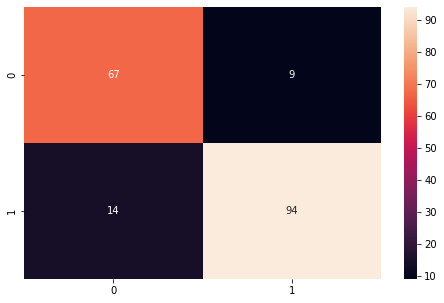

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(cm_lr,annot=True)
plt.show()

In [39]:
from sklearn.metrics import classification_report
cr_lr = classification_report(y_test,predictions)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        76
           1       0.91      0.87      0.89       108

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



tpr_LR:  [0.         0.11842105 1.        ]
fpr_LR:  [0.         0.87037037 1.        ]
threshold_LR: [2 1 0]
Area Under The Curve : 0.8759746588693956


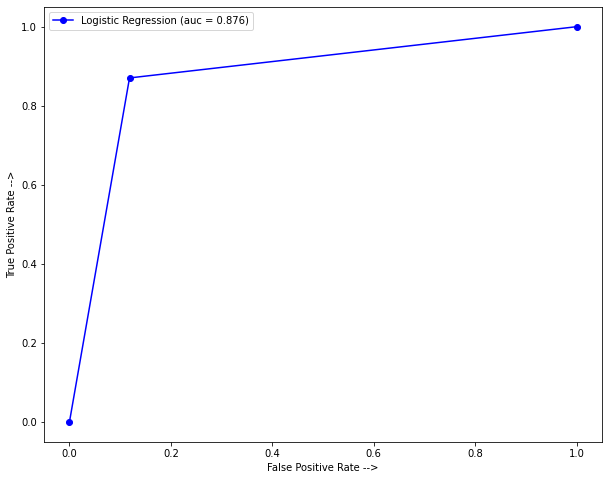

In [40]:
from sklearn.metrics import roc_curve,auc
tpr_LR,fpr_LR,threshold_LR = roc_curve(y_test,predictions)
print('tpr_LR: ',tpr_LR)
print('fpr_LR: ',fpr_LR)
print('threshold_LR:',threshold_LR)

auc_LR = auc(tpr_LR,fpr_LR)
print('Area Under The Curve :',auc_LR)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(10,8))
plt.plot(tpr_LR,fpr_LR,marker='o',color='blue',label='Logistic Regression (auc = %0.3f)'% auc_LR)
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')

plt.legend()

plt.show()

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

S_V_C = SVC(C =1,kernel='rbf', random_state=22)
Cross_Validation_S_V_C = cross_validate(S_V_C, X_train, y_train, cv=6, return_train_score=True)

print('Train score value :',Cross_Validation_S_V_C['train_score'])
print('Test score value :',Cross_Validation_S_V_C['test_score'])

score_value_S_V_C = cross_val_score(estimator=S_V_C, X = X_train, y = y_train, cv=6)
print('Cross_Validation Score is :',np.mean(score_value_S_V_C)*100)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

Train score value : [0.90180033 0.90343699 0.91993464 0.91503268 0.91666667 0.91993464]
Test score value : [0.86178862 0.87804878 0.8852459  0.8852459  0.8442623  0.86065574]
Cross_Validation Score is : 86.9207872406593


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [42]:
S_V_C.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, random_state=22)

In [43]:
y_pred_S_V_C = S_V_C.predict(X_test)
print('Y Test: \n',y_test[:3,:])
print('Y Predict: ',y_pred_S_V_C[:3,])

Y Test: 
 [[1]
 [1]
 [1]]
Y Predict:  [1 1 1]


In [44]:
from sklearn.metrics import accuracy_score
accuracy_S_V_C=accuracy_score(y_test,y_pred_S_V_C)
print(accuracy_S_V_C)

0.8641304347826086


[[64 12]
 [13 95]]


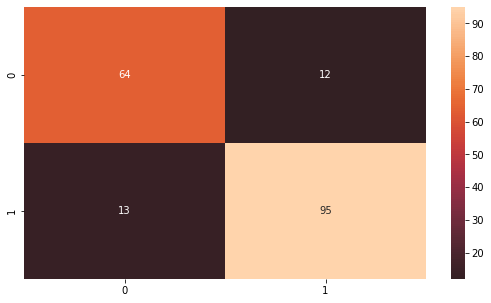

In [45]:
from sklearn.metrics import confusion_matrix
cm_S_V_C=confusion_matrix(y_test,y_pred_S_V_C)
print(cm_S_V_C)
plt.figure(figsize=(9,5))
sns.heatmap(cm_S_V_C,center=True,annot=True)
plt.show()

In [46]:
from sklearn.metrics import classification_report
cr_S_V_C=classification_report(y_test,y_pred_S_V_C)
print(cr_S_V_C)

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        76
           1       0.89      0.88      0.88       108

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



tpr_S_V_C [0.         0.15789474 1.        ]
fpr_S_V_C [0.         0.87962963 1.        ]
threshold_S_V_C [2 1 0]


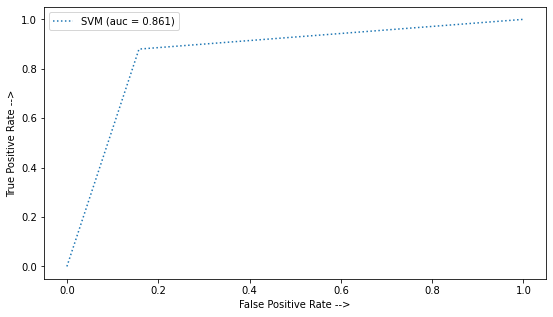

In [47]:
from sklearn.metrics import roc_curve,auc
tpr_S_V_C,fpr_S_V_C,threshold_S_V_C=roc_curve(y_test,y_pred_S_V_C)
auc_S_V_C=auc(tpr_S_V_C, fpr_S_V_C)
print('tpr_S_V_C',tpr_S_V_C)
print('fpr_S_V_C',fpr_S_V_C)
print('threshold_S_V_C',threshold_S_V_C)


#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(tpr_S_V_C, fpr_S_V_C, linestyle=':', label='SVM (auc = %0.3f)' % auc_S_V_C)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=27)
Cross_Validation = cross_validate(knn,X_train,y_train,cv=6,return_train_score=True)

print('Train Score Value :',Cross_Validation['train_score'])
print('Test Score Value :',Cross_Validation['test_score'])

score_knn = cross_val_score(estimator= knn, X = X_train, y=y_train, cv=6)
print('Validation Score :',np.mean(score_knn)*100)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

Train Score Value : [0.86252046 0.86415712 0.85784314 0.87418301 0.86928105 0.8627451 ]
Test Score Value : [0.86178862 0.89430894 0.87704918 0.86885246 0.82786885 0.86065574]
Validation Score : 86.50872984139677


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when

In [49]:
knn.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(n_neighbors=27)

In [50]:
y_predict_knn =knn.predict(X_test)
print('y_test :',y_test[:3,])
print('y_predict',y_predict_knn[:3,])

y_test : [[1]
 [1]
 [1]]
y_predict [1 1 1]


In [51]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test,y_predict_knn)
print('accuracy_LR',accuracy_knn)

accuracy_LR 0.8695652173913043


In [52]:
from sklearn.metrics import confusion_matrix
cm_knn  = confusion_matrix(y_test,y_predict_knn)
print(cm_knn)

[[65 11]
 [13 95]]


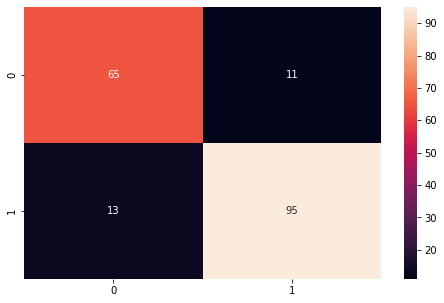

In [53]:
plt.figure(figsize=(8,5))
sns.heatmap(cm_knn,annot=True)
plt.show()

In [54]:
from sklearn.metrics import classification_report
cr_knn = classification_report(y_test,y_predict_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        76
           1       0.90      0.88      0.89       108

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



knn_tpr [0.         0.14473684 1.        ]
knn_fpr [0.         0.87962963 1.        ]
threhold [2 1 0]


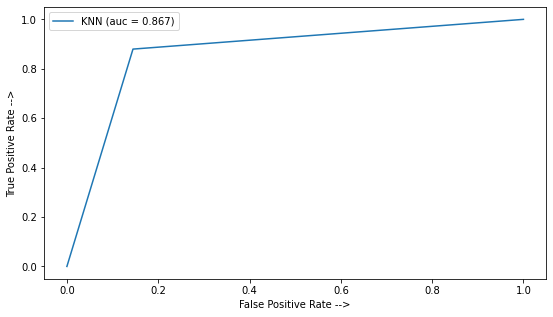

In [55]:
from sklearn.metrics import roc_curve,auc
knn_tpr,knn_fpr,threshold=roc_curve(y_test,y_predict_knn)
knn_auc=auc(knn_tpr,knn_fpr)
print('knn_tpr',knn_tpr)
print('knn_fpr',knn_fpr)
print('threhold',threshold)

plt.figure(figsize=(9,5))
plt.plot(knn_tpr,knn_fpr,linestyle='-', label='KNN (auc = %0.3f)' % knn_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

dt=DecisionTreeClassifier(criterion = 'entropy',random_state=22,max_depth=6)
Cross_Validation_dt = cross_validate(dt, X_train,y_train,cv=6,return_train_score=True)

print('Train score value',Cross_Validation_dt['train_score'])
print('Test score value',Cross_Validation_dt['test_score'])

score_value_dt = cross_val_score(estimator=dt, X=X_train,y= y_train,cv=6)
print('Cross_Validation Score is :',np.mean(score_value_dt)*100)

Train score value [0.92471358 0.91653028 0.9248366  0.92973856 0.92647059 0.92156863]
Test score value [0.79674797 0.82113821 0.79508197 0.81147541 0.82786885 0.81967213]
Cross_Validation Score is : 81.1997423252921


In [57]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=22)

In [58]:
y_pred_dt=dt.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(y_test,y_pred_dt)
print('Accuracy Score',accuracy_dt)

Accuracy Score 0.842391304347826


[[60 16]
 [13 95]]


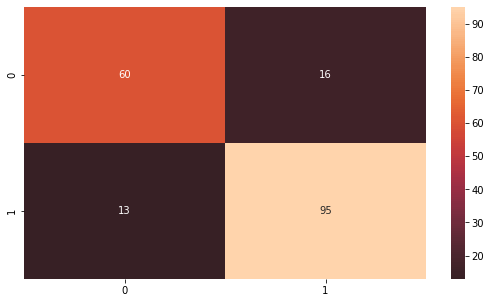

In [60]:
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred_dt)
print(cm_dt)
plt.figure(figsize=(9,5))
sns.heatmap(cm_dt,center=True,annot=True)
plt.show()

In [61]:
from sklearn.metrics import classification_report
cr_dt=classification_report(y_test,y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        76
           1       0.86      0.88      0.87       108

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



dt_tpr Value  :  [0.         0.21052632 1.        ]
dt_fpr Value  :  [0.         0.87962963 1.        ]
thresholds Value  :  [2 1 0]


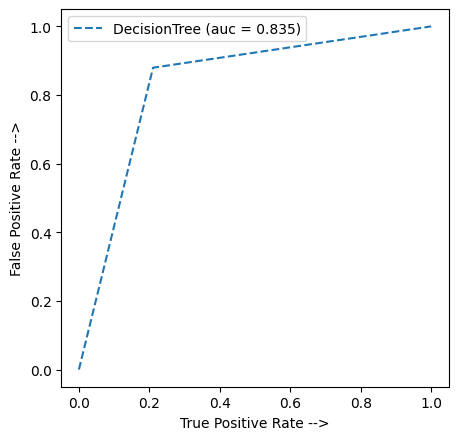

In [62]:
from sklearn.metrics import roc_curve,auc
dt_tpr,dt_fpr,threshold=roc_curve(y_test,y_pred_dt)
dt_auc=auc(dt_tpr,dt_fpr)
print('dt_tpr Value  : ', dt_tpr)
print('dt_fpr Value  : ', dt_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dt_tpr, dt_fpr, linestyle='--', label='DecisionTree (auc = %0.3f)' % dt_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

In [63]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

rf=RandomForestClassifier(criterion = 'entropy',random_state=22,max_depth=10,n_estimators=100)
Cross_Validation_rf = cross_validate(rf, X_train,y_train,cv=6,return_train_score=True)

print('Train score value',Cross_Validation_rf['train_score'])
print('Test score value',Cross_Validation_rf['test_score'])

score_value_rf = cross_val_score(estimator=rf, X=X_train,y= y_train,cv=6)
print('Cross_Validation Score is :',np.mean(score_value_rf)*100)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Train score value [0.98363339 0.99181669 0.99346405 0.99183007 0.99346405 0.99346405]
Test score value [0.84552846 0.87804878 0.87704918 0.85245902 0.86885246 0.86065574]


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Cross_Validation Score is : 86.37656048691635


In [64]:
rf.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', max_depth=10, random_state=22)

In [65]:
y_pred_rf=rf.predict(X_test)
print('Y Test: ',y_test[:3,:])
print('Y Pred',y_pred_rf[:3,])

Y Test:  [[1]
 [1]
 [1]]
Y Pred [1 1 1]


In [66]:
from sklearn.metrics import accuracy_score
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print('Accuracy Score',accuracy_rf)

Accuracy Score 0.8858695652173914


[[64 12]
 [ 9 99]]


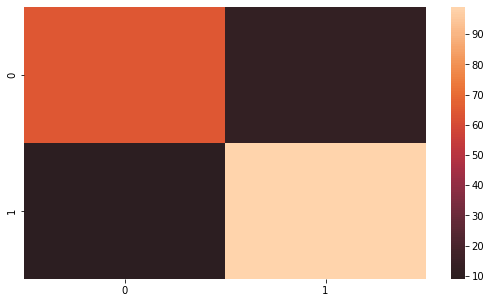

In [67]:
from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test,y_pred_rf)
print(cm_rf)
plt.figure(figsize=(9,5))
sns.heatmap(cm_rf,center=True)
plt.show()

In [68]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        76
           1       0.89      0.92      0.90       108

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



rf_tpr Value  :  [0.         0.15789474 1.        ]
rf_fpr Value  :  [0.         0.91666667 1.        ]
thresholds Value  :  [2 1 0]


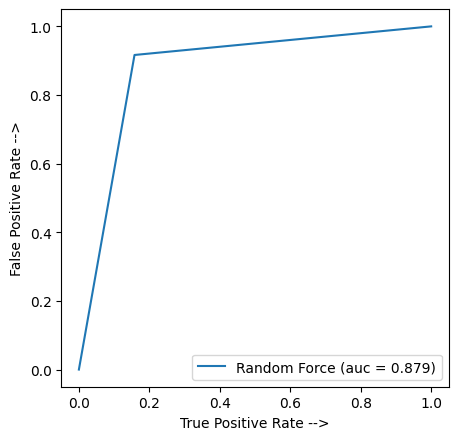

In [69]:
from sklearn.metrics import roc_curve,auc
rf_tpr,rf_fpr,threshold=roc_curve(y_test,y_pred_rf)
rf_auc=auc(rf_tpr,rf_fpr)
print('rf_tpr Value  : ', rf_tpr)
print('rf_fpr Value  : ', rf_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Random Force (auc = %0.3f)' % rf_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

In [70]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

NB=BernoulliNB()
Cross_Validation_NB = cross_validate(NB, X_train,y_train,cv=6,return_train_score=True)

print('Train score value',Cross_Validation_NB['train_score'])
print('Test score value',Cross_Validation_NB['test_score'])

score_value_NB = cross_val_score(estimator=NB, X=X_train,y= y_train,cv=6)
print('Cross_Validation Score is :',np.mean(score_value_NB)*100)

Train score value [0.85924714 0.84779051 0.85784314 0.85130719 0.85947712 0.85947712]
Test score value [0.83739837 0.8699187  0.86065574 0.85245902 0.83606557 0.8442623 ]
Cross_Validation Score is : 85.01266160202586


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/con

In [71]:
NB.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BernoulliNB()

In [72]:
#Calculating Prediction
y_pred_NB = NB.predict(X_test)
y_pred_prob = NB.predict_proba(X_test)
y_pred_prob=y_pred_prob.astype(int)
print('Y Test \n' ,y_test[:10,:])
print('Predicted Value for BernoulliNBModel is :\n ' , y_pred_NB[:10,])
print('Prediction Probabilities Value for BernoulliNBModel is : \n' , y_pred_prob[:10,:])

Y Test 
 [[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]
Predicted Value for BernoulliNBModel is :
  [1 1 1 0 1 0 0 1 0 0]
Prediction Probabilities Value for BernoulliNBModel is : 
 [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [73]:
from sklearn.metrics import accuracy_score
accuracy_NB=accuracy_score(y_test,y_pred_NB)
print(accuracy_NB)

0.8641304347826086


[[63 13]
 [12 96]]


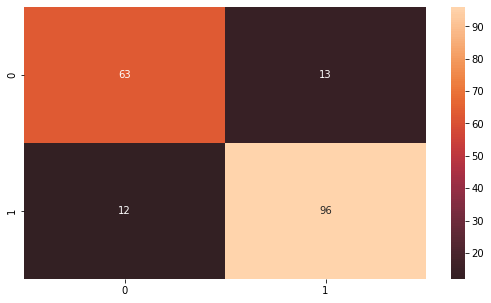

In [74]:
from sklearn.metrics import confusion_matrix
cm_NB=confusion_matrix(y_test,y_pred_NB)
print(cm_NB)
plt.figure(figsize=(9,5))
sns.heatmap(cm_NB,center=True,annot=True)
plt.show()

In [75]:
from sklearn.metrics import classification_report
cr_NB=classification_report(y_test,y_pred_NB)
print(cr_NB)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        76
           1       0.88      0.89      0.88       108

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



nb_tpr Value  :  [0.         0.17105263 1.        ]
nb_fpr Value  :  [0.         0.88888889 1.        ]
thresholds Value  :  [2 1 0]


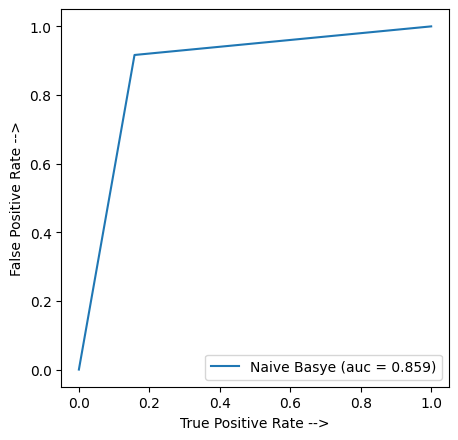

In [76]:
from sklearn.metrics import roc_curve,auc
nb_tpr,nb_fpr,threshold=roc_curve(y_test,y_pred_NB)
nb_auc=auc(nb_tpr,nb_fpr)
print('nb_tpr Value  : ', nb_tpr)
print('nb_fpr Value  : ', nb_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Naive Basye (auc = %0.3f)' % nb_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

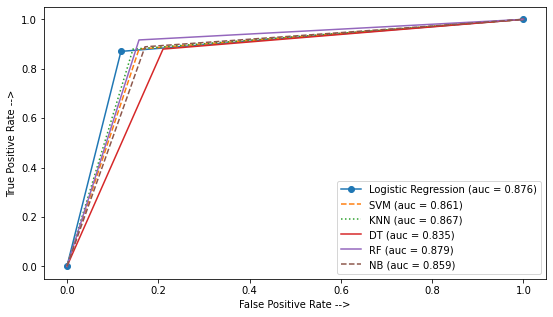

In [77]:
from sklearn.metrics import roc_curve, auc

tpr_LR,fpr_LR,threshold_LR=roc_curve(y_test,predictions)
auc_LR = auc(tpr_LR, fpr_LR)

tpr_S_V_C,fpr_S_V_C , threshold_S_V_C = roc_curve(y_test, y_pred_S_V_C)
svm_auc = auc(tpr_S_V_C, fpr_S_V_C)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_predict_knn)
knn_auc = auc(knn_fpr, knn_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt)
dt_auc = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
rf_auc = auc(rf_fpr, rf_tpr)


nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_NB)
nb_auc = auc(nb_fpr, nb_tpr)

plt.figure(figsize=(9, 5))
plt.plot(tpr_LR, fpr_LR, marker='o', label='Logistic Regression (auc = %0.3f)' % auc_LR)
plt.plot(tpr_S_V_C, fpr_S_V_C, linestyle='--', label='SVM (auc = %0.3f)' % auc_S_V_C)
plt.plot(knn_fpr, knn_tpr, linestyle=':', label='KNN (auc = %0.3f)' % knn_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='NB (auc = %0.3f)' % nb_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

In [78]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN','Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    'Score': [Accuracy_lr, accuracy_S_V_C, accuracy_knn, 
              accuracy_dt, accuracy_rf, accuracy_NB]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,0.885870
0,Logistic Regression,0.875000
2,KNN,0.869565
1,Support Vector Machines,0.864130
5,Naive Bayes,0.864130
3,Decision Tree,0.842391
